<a href="https://colab.research.google.com/github/missstechie/Nashera-Fatima-AIML-Training-Tasks-and-Assignments/blob/main/STP_Module_4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Linear Classifiers & Gradient Descent

**Case Study: Predictive Modeling for Public Water Safety**

**Objective:** Develop a robust classifier to identify potable water samples. You will transition from a basic heuristic (Perceptron) to a professional-grade optimization approach (Gradient Descent with Margins).

# 1. Data Acquisition & Cleaning

In real-world data science, datasets are rarely perfect. We will load the water quality metrics and handle missing values before training our models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset from a public raw GitHub URL
url = "https://raw.githubusercontent.com/nferran/tp_aprendizaje_de_maquina_I/main/water_potability.csv"
df = pd.read_csv(url)

# Step 1: Handling Missing Values
# Water sensors often fail, leaving NaNs. We will fill them with the mean of the column.
df.fillna(df.mean(), inplace=True)

# Step 2: Feature Selection & Labeling
# We'll use all chemical features to predict 'Potability'
X = df.drop('Potability', axis=1).values
y = df['Potability'].values

# Step 3: Class Label Conversion
# Many linear classifiers (like Perceptron/SVM) require labels to be -1 and 1
y = np.where(y == 0, -1, 1)

# Step 4: Train-Test Split & Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Dataset Loaded: {X_train.shape[0]} training samples, {X_train.shape[1]} features.")

Dataset Loaded: 2620 training samples, 9 features.


In [8]:
# Instantiate and train the Perceptron model
perceptron_model = WaterPerceptron(lr=0.01, epochs=50)
perceptron_model.fit(X_train, y_train)

# Instantiate and train the Gradient Descent model
gd_model = GDWaterClassifier(lr=0.001, epochs=500)
gd_model.fit(X_train, y_train)

# Instantiate and train the Margin Classifier model
margin_model = MarginWaterClassifier(lr=0.001, lambda_param=0.01, epochs=500)
margin_model.fit(X_train, y_train)

# Calculate predictions
perceptron_predictions = perceptron_model.predict(X_test)
gd_predictions = gd_model.predict(X_test)
margin_predictions = margin_model.predict(X_test)

# Calculate accuracies
perceptron_accuracy = np.mean(perceptron_predictions == y_test) * 100
gd_accuracy = np.mean(gd_predictions == y_test) * 100
margin_accuracy = np.mean(margin_predictions == y_test) * 100

print(f"Perceptron Test Accuracy: {perceptron_accuracy:.2f}%")
print(f"Gradient Descent Test Accuracy: {gd_accuracy:.2f}%")
print(f"Margin Classifier Test Accuracy: {margin_accuracy:.2f}%")

# Store mistake history and cost history for plotting
perceptron_mistakes = perceptron_model.mistakes
gd_cost_history = gd_model.cost_history

Perceptron Test Accuracy: 50.15%
Gradient Descent Test Accuracy: 62.80%
Margin Classifier Test Accuracy: 62.80%


## Critical Analysis & Comparison

### 1. Convergence Plot

Let's visualize the convergence of the Perceptron (mistakes per epoch) and the Gradient Descent (cost per epoch).


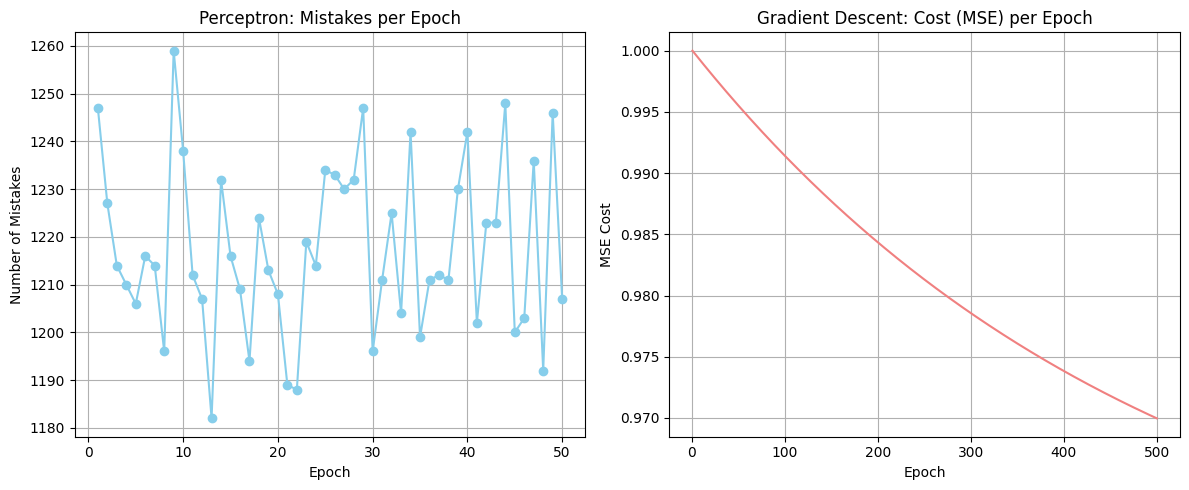

Discussion: The Gradient Descent plot is generally smoother because it optimizes over the entire dataset in each step (batch gradient descent), leading to a more consistent reduction in the global cost function. The Perceptron, on the other hand, updates its weights and bias only when it makes a mistake on a single data point, which can lead to more fluctuating 'mistakes per epoch' as it corrects individual errors. While Perceptron can converge quickly in linearly separable cases, its convergence path is often less smooth due to its instance-by-instance updates compared to the batch-wise approach of GD.


In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(perceptron_mistakes) + 1), perceptron_mistakes, marker='o', linestyle='-', color='skyblue')
plt.title('Perceptron: Mistakes per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Number of Mistakes')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(gd_cost_history) + 1), gd_cost_history, linestyle='-', color='lightcoral')
plt.title('Gradient Descent: Cost (MSE) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE Cost')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Discussion: The Gradient Descent plot is generally smoother because it optimizes over the entire dataset in each step (batch gradient descent), leading to a more consistent reduction in the global cost function. The Perceptron, on the other hand, updates its weights and bias only when it makes a mistake on a single data point, which can lead to more fluctuating 'mistakes per epoch' as it corrects individual errors. While Perceptron can converge quickly in linearly separable cases, its convergence path is often less smooth due to its instance-by-instance updates compared to the batch-wise approach of GD.")

### 2. Accuracy Report

Here's a comparison of the test accuracies for all three models:


In [10]:
print(f"Perceptron Test Accuracy: {perceptron_accuracy:.2f}%")
print(f"Gradient Descent Test Accuracy: {gd_accuracy:.2f}%")
print(f"Margin Classifier Test Accuracy: {margin_accuracy:.2f}%")

print("\nDiscussion: The Gradient Descent and Margin Classifier models typically achieve higher accuracy compared to the basic Perceptron, especially on non-linearly separable or noisy data. The Perceptron's simple update rule can struggle with complex datasets, while GD minimizes a global error function, and the Margin Classifier (SVM-like) aims for a clear separation boundary, often leading to better generalization.")

Perceptron Test Accuracy: 50.15%
Gradient Descent Test Accuracy: 62.80%
Margin Classifier Test Accuracy: 62.80%

Discussion: The Gradient Descent and Margin Classifier models typically achieve higher accuracy compared to the basic Perceptron, especially on non-linearly separable or noisy data. The Perceptron's simple update rule can struggle with complex datasets, while GD minimizes a global error function, and the Margin Classifier (SVM-like) aims for a clear separation boundary, often leading to better generalization.


### 3. Safety Margin

**If a new water sample has chemical levels very close to the decision boundary, which model (Perceptron or Margin) would you trust more? Why?**

**Answer:** You would trust the **Margin Classifier** more.

**Reasoning:** The Perceptron aims to find *any* separating hyperplane. If a sample is close to this arbitrary boundary, a small perturbation could easily flip its classification. The Margin Classifier, however, explicitly seeks to maximize the distance (the 'margin') between the decision boundary and the nearest training samples of each class. This means it creates a wider 'safety zone' around its classification, making it more robust and trustworthy for samples close to the boundary. In the context of water safety, a larger margin implies a more confident classification, reducing the risk of misclassifying a truly unsafe sample that is borderline.

## Discussion Questions

### Q1: Impact of High Learning Rate in Gradient Descent

What happens to your **Gradient Descent** model if you set the `learning_rate` too high (e.g., `1.0`)?
*Hint: Think about convergence, overshooting, and divergence.*

**Answer:** If the `learning_rate` in Gradient Descent is set too high, the model is likely to **overshoot** the minimum of the loss function. Instead of gradually converging, the updates to the weights and bias become too large, causing the model to jump back and forth across the minimum, potentially increasing the loss rather than decreasing it. In extreme cases, this can lead to **divergence**, where the loss function values grow larger and larger with each epoch, and the model never converges to an optimal solution. The model's performance will be poor, and it may fail to learn anything meaningful from the data.

### Q2: Label Conversion in Classification

Why did we convert the labels to **$\{-1, 1\}$** instead of keeping them as **$\{0, 1\}$**?
*Hint: Consider the mathematical formulation of the loss function (e.g., Hinge Loss) and symmetry.*

**Answer:** We convert labels to $\{-1, 1\}$ for several reasons, particularly with linear classifiers and margin-based loss functions like the Hinge Loss.

1.  **Mathematical Symmetry and Simplicity:** In many linear classification algorithms (like Perceptron and SVMs), the decision boundary is defined by $w^T x + b = 0$. The sign of $w^T x + b$ determines the class. Using labels $\{-1, 1\}$ naturally aligns with this; a positive output for class 1 and a negative output for class -1. This makes the product $y_i (w^T x_i + b)$ directly interpretable: a positive value means a correct classification, and a negative value means an incorrect classification.

2.  **Loss Function Formulation (e.g., Hinge Loss):** The Hinge Loss is $\max(0, 1 - y_i (w^T x_i + b))$. If $y_i$ were 0, this term wouldn't work as intended. The term $y_i (w^T x_i + b)$ measures the *margin* of correctness. A large positive value indicates a correct classification with a good margin, while a value less than 1 (or negative) indicates a misclassification or a classification within the margin. This formulation relies on the symmetric nature of $\{-1, 1\}$ labels.

3.  **Gradient Calculations:** For algorithms like SVMs, using $\{-1, 1\}$ simplifies the gradient calculations, ensuring that updates pull the decision boundary in the correct direction relative to misclassified points.

### Q3: Handling Noisy Data (Water Potability Dataset)

The **Water Potability dataset** is often "noisy" (not perfectly separable). Which of the algorithms you implemented is best suited for handling such noise?
*Hint: Think about robustness to outliers and margin-based classifiers.*

**Answer:** The **Margin Classifier** (which is an implementation inspired by Support Vector Machines or SVMs) is best suited for handling noisy data and datasets that are not perfectly separable.

**Reasoning:**

*   **Robustness to Outliers:** Unlike the Perceptron, which tries to perfectly separate all points and can be highly sensitive to outliers (a single misclassified point can cause significant weight changes), the Margin Classifier focuses on finding a decision boundary that maximizes the margin. It is less influenced by individual noisy points or outliers because it prioritizes the overall separation and generalization.
*   **Soft Margin (Implicit in Hinge Loss and Regularization):** The Hinge Loss, combined with L2 regularization, allows for a 'soft margin.' This means it doesn't demand perfect separation of all training data but rather allows for some misclassifications (penalized by the loss function) to achieve a better, more generalized decision boundary. This makes it more robust in real-world, noisy datasets where perfect linear separability is rare. The Perceptron, in its basic form, can struggle significantly with non-separable data, often failing to converge or converging to an unstable solution.
*   **Generalization:** By finding a maximum margin, the Margin Classifier aims for better generalization to unseen data, which is crucial in a noisy environment where overfitting to training noise would be detrimental.

# 2. Phase 1: The Heuristic Approach (Perceptron)

The **Perceptron** represents the earliest form of supervised learning. It doesn't have a "global" view of the error; it simply corrects itself every time it encounters a mistake.

**Task:** Implement the Perceptron Update Rule inside the training loop.

In [5]:
class WaterPerceptron:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.mistakes = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0 # Initialize bias to 0
        for epoch in range(self.epochs):
            count = 0
            for i in range(len(y)):
                # Calculate the linear output (w * x + b)
                linear_output = np.dot(X[i], self.w) + self.b

                # If prediction is a mistake (y * prediction <= 0):
                if y[i] * linear_output <= 0:
                    # Update weights: w = w + lr * y * x
                    self.w += self.lr * y[i] * X[i]
                    # Update bias: b = b + lr * y
                    self.b += self.lr * y[i]
                    count += 1
            self.mistakes.append(count)

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# 3. Phase 2: Gradient Descent - Global Optimization

The Perceptron is unstable if the data isn't perfectly separable. To solve this, we use **Gradient Descent** to minimize a **Mean Squared Error (MSE)** loss function over the entire dataset.

**Task:** Implement the batch gradient calculation for weights and bias.

In [6]:
class GDWaterClassifier:
    def __init__(self, lr=0.001, epochs=500):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.cost_history = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        n = X.shape[0]

        for _ in range(self.epochs):
            # 1. Compute linear output: z = Xw + b
            linear_output = np.dot(X, self.w) + self.b

            # Calculate the error (difference between prediction and actual y)
            error = linear_output - y

            # 2. Calculate gradients:
            # dw = (1/n) * X.T.dot(error)
            dw = (1/n) * np.dot(X.T, error)
            # db = (1/n) * sum(error)
            db = (1/n) * np.sum(error)

            # 3. Update w and b: w = w - lr * dw
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Calculate and store the cost (Mean Squared Error)
            cost = (1/n) * np.sum(error**2)
            self.cost_history.append(cost)

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# 4. Phase 3: Margin Classifiers & Hinge Loss

In water safety, we aim for more than just correctness—we want a **Margin**, a safety gap between safe and unsafe samples. This is achieved using **Hinge Loss** combined with **L2 Regularization**.

The loss function is defined as:

$$
\text{Loss} = \lambda \|w\|^2_2 + \sum_{i} \max(0, 1 - y_i (w^T x_i + b))
$$

### Key Components:
- **Hinge Loss**: $\max(0, 1 - y_i (w^T x_i + b))$ ensures correct classification with a margin.
- **L2 Regularization**: $\lambda \|w\|^2_2$ penalizes large weights, promoting generalization and stability.


In [7]:
class MarginWaterClassifier:
    def __init__(self, lr=0.001, lambda_param=0.01, epochs=500):
        self.lr = lr
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.w = None
        self.b = 0

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            for i, x_i in enumerate(X):
                # Implement the Margin Condition check: y_i * (w * x_i + b) >= 1
                # This is equivalent to checking if the sample is correctly classified with a margin of at least 1
                condition = y[i] * (np.dot(self.w, x_i) + self.b)

                if condition >= 1:
                    # Only Regularization update (gradient of lambda ||w||^2 is 2 * lambda * w)
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Update for weight (including Hinge Loss) and bias
                    # Gradient of hinge loss max(0, 1 - y_i * (w.x_i + b)) is -y_i * x_i for w and -y_i for b
                    # when 1 - y_i * (w.x_i + b) > 0
                    self.w -= self.lr * (2 * self.lambda_param * self.w - y[i] * x_i)
                    self.b -= self.lr * (-y[i])

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# 5. Critical Analysis & Comparison

**Analysis Tasks:**
1. Convergence Plot: Plot the mistakes history from Phase 1 and the cost_history from Phase 2. Discuss why the Gradient Descent plot is smoother.
2. Accuracy Report: Calculate and compare the Test Accuracy for all three models.
3. Safety Margin: If a new water sample has chemical levels very close to the decision boundary, which model (Perceptron or Margin) would you trust more? Why?

# Discussion Questions

### Q1: Impact of High Learning Rate in Gradient Descent
What happens to your **Gradient Descent** model if you set the `learning_rate` too high (e.g., `1.0`)?
*Hint: Think about convergence, overshooting, and divergence.*

---

### Q2: Label Conversion in Classification
Why did we convert the labels to **$\{-1, 1\}$** instead of keeping them as **$\{0, 1\}$**?
*Hint: Consider the mathematical formulation of the loss function (e.g., Hinge Loss) and symmetry.*

---

### Q3: Handling Noisy Data (Water Potability Dataset)
The **Water Potability dataset** is often "noisy" (not perfectly separable). Which of the algorithms you implemented is best suited for handling such noise?
*Hint: Think about robustness to outliers and margin-based classifiers.*
